In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as ani
import matplotlib.cm as cm  

In [2]:
#constants of nature

mu0 = 4 * np.pi * 1e-7
e0 = 8.85e-12
c = np.sqrt(1 / (mu0 * e0))
k = 1 / (4 * np.pi * e0)
print("the speed of light is:", c)
c = 0.5

dt = 0.0007

the speed of light is: 299863380.46612763


In [69]:
t0 = 0
t1 = 40
timesteps = np.arange(t0, t1, dt)
print(timesteps.shape)

(57143,)


In [70]:
def external_force_func(E0,omega,timesteps):
    return (E0 * np.sin(omega * timesteps))

E0 = 0.03 #0.02
omega = np.sqrt(2) 

    

In [71]:
class Particle:
    
    def __init__(self, mass=1, charge=1, pos=np.array([0.0,0.0,0.0]), vel=np.array([0.0,0.0,0.0]), acc=np.array([0.0,0.0,0.0])):
        self.mass = mass
        self.charge = charge
        self.pos = pos
        self.vel = vel
        self.acc = acc

class Dipole:
    
    def __init__(self, timesteps, distance=1, charge=1, k=1):
        self.distance = distance
        self.charge = charge
        self.mass = 1
        self.particle1 = Particle(mass=self.mass, charge=self.charge, pos=np.array([-distance/2, 0,0]))
        self.particle2 = Particle(mass=self.mass, charge=-self.charge, pos=np.array([distance/2, 0,0]))
        self.dipole_moment = self.charge * np.array([self.distance, 0, 0])
        self.force = 0
        self.timesteps = timesteps
        self.pos1 = np.zeros((self.timesteps.size, 3))
        self.pos2 = np.zeros((self.timesteps.size, 3))
        
        self.vel_1 = np.zeros((self.timesteps.size, 3))
        self.accel_1 = np.zeros((self.timesteps.size, 3))
        
        self.vel_2 = np.zeros((self.timesteps.size, 3))
        self.accel_2 = np.zeros((self.timesteps.size, 3))
        
        self.k = k
        
        
        
        
    def update(self, external_force):
        r = self.particle2.pos - self.particle1.pos
        
        spring_force = self.k * (np.linalg.norm(r) - self.distance) * (r / np.linalg.norm(r))
        force = spring_force + external_force * self.charge
        
        self.particle1.acc = force / self.particle1.mass
        self.particle2.acc = -force / self.particle2.mass
        self.particle1.vel = self.particle1.vel + self.particle1.acc * dt
        self.particle2.vel = self.particle2.vel + self.particle2.acc * dt
        
        self.particle1.pos += self.particle1.vel * dt
        self.particle2.pos += self.particle2.vel * dt
        
    def calc_trajectory(self):
        
        for i, time in enumerate(self.timesteps):
            self.pos1[i] = self.particle1.pos
            self.pos2[i] = self.particle2.pos
            
            self.vel_1[i] = self.particle1.vel
            self.vel_2[i] = self.particle2.vel

            self.accel_1[i] = self.particle1.acc
            self.accel_2[i] = self.particle2.acc
            
            external_force = np.array([external_force_arr[i], 0, 0])
            
            self.update(external_force)
            
        return self.pos1, self.pos2
    
        

<IPython.core.display.Javascript object>


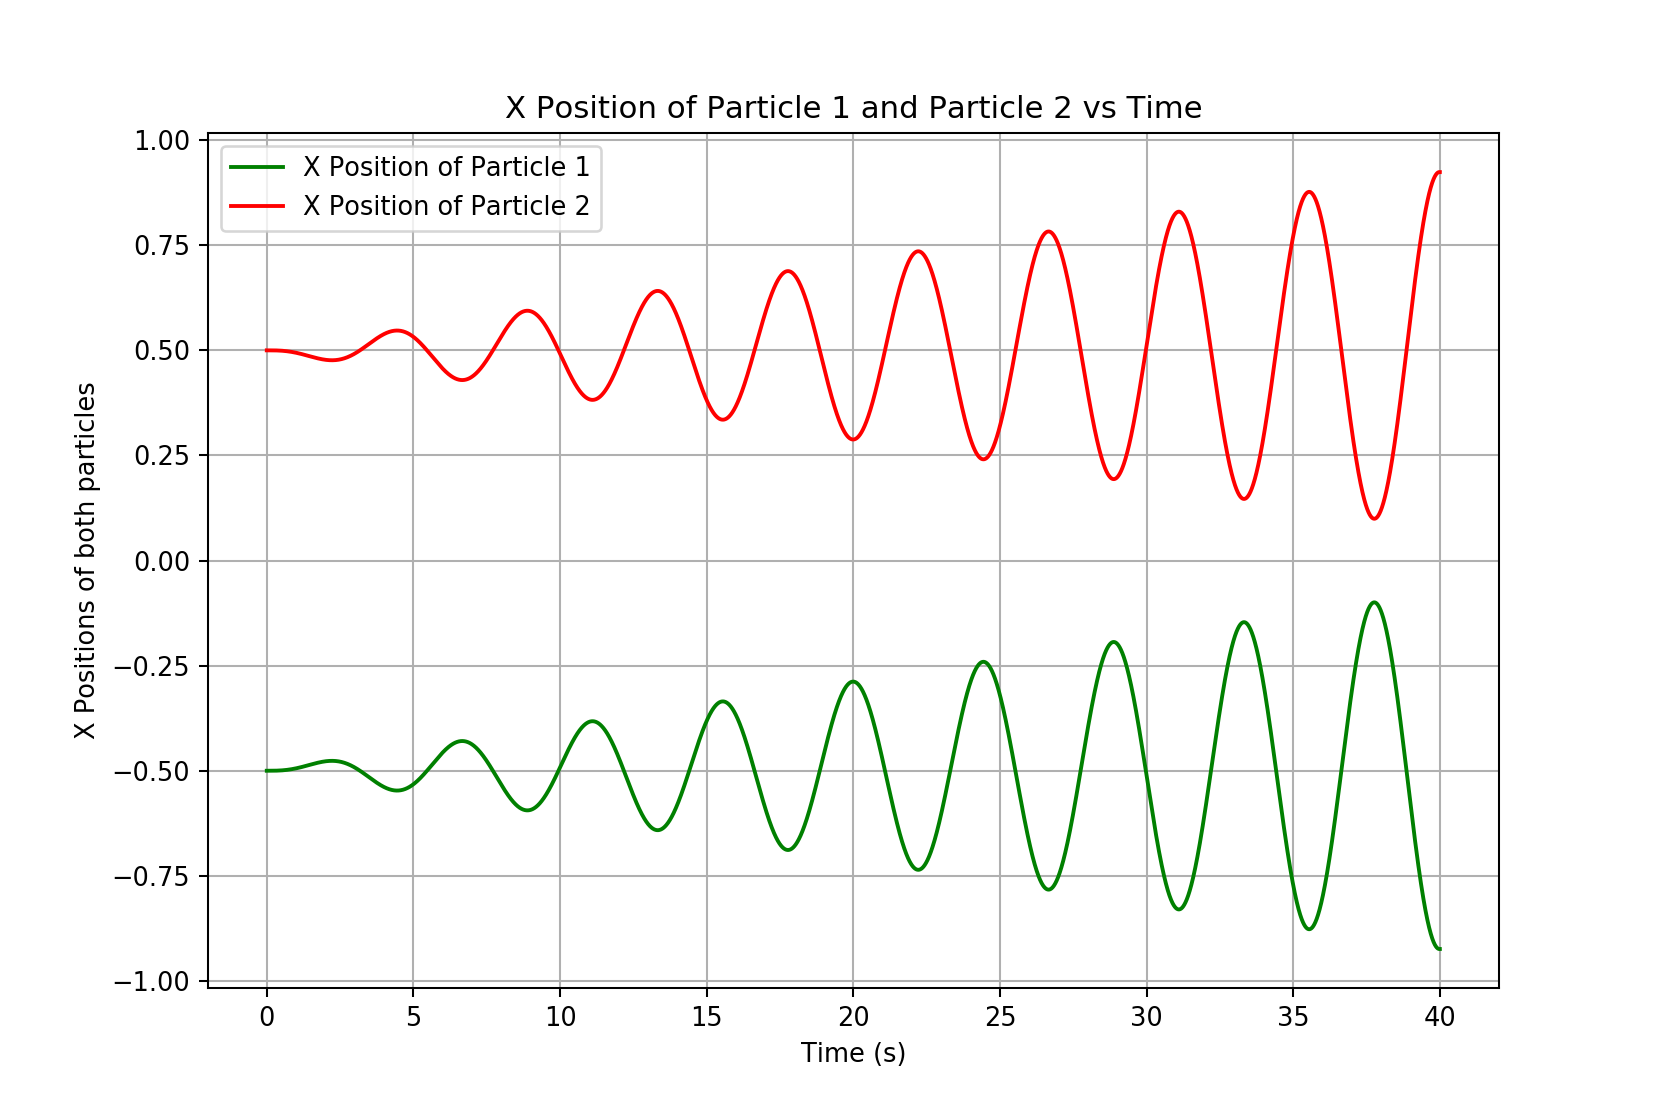

In [72]:
dipole = Dipole(timesteps)
external_force_arr = external_force_func(E0,omega,timesteps)
dipole.calc_trajectory()

fig, (ax1) = plt.subplots(1, figsize=(9,6))

ax1.plot(timesteps, dipole.pos1[:, 0], 'g', label = 'X Position of Particle 1')
ax1.plot(timesteps, dipole.pos2[:, 0], 'r', label = 'X Position of Particle 2')
ax1.grid()


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Positions of both particles")
ax1.title.set_text("X Position of Particle 1 and Particle 2 vs Time")
ax1.legend()

<IPython.core.display.Javascript object>


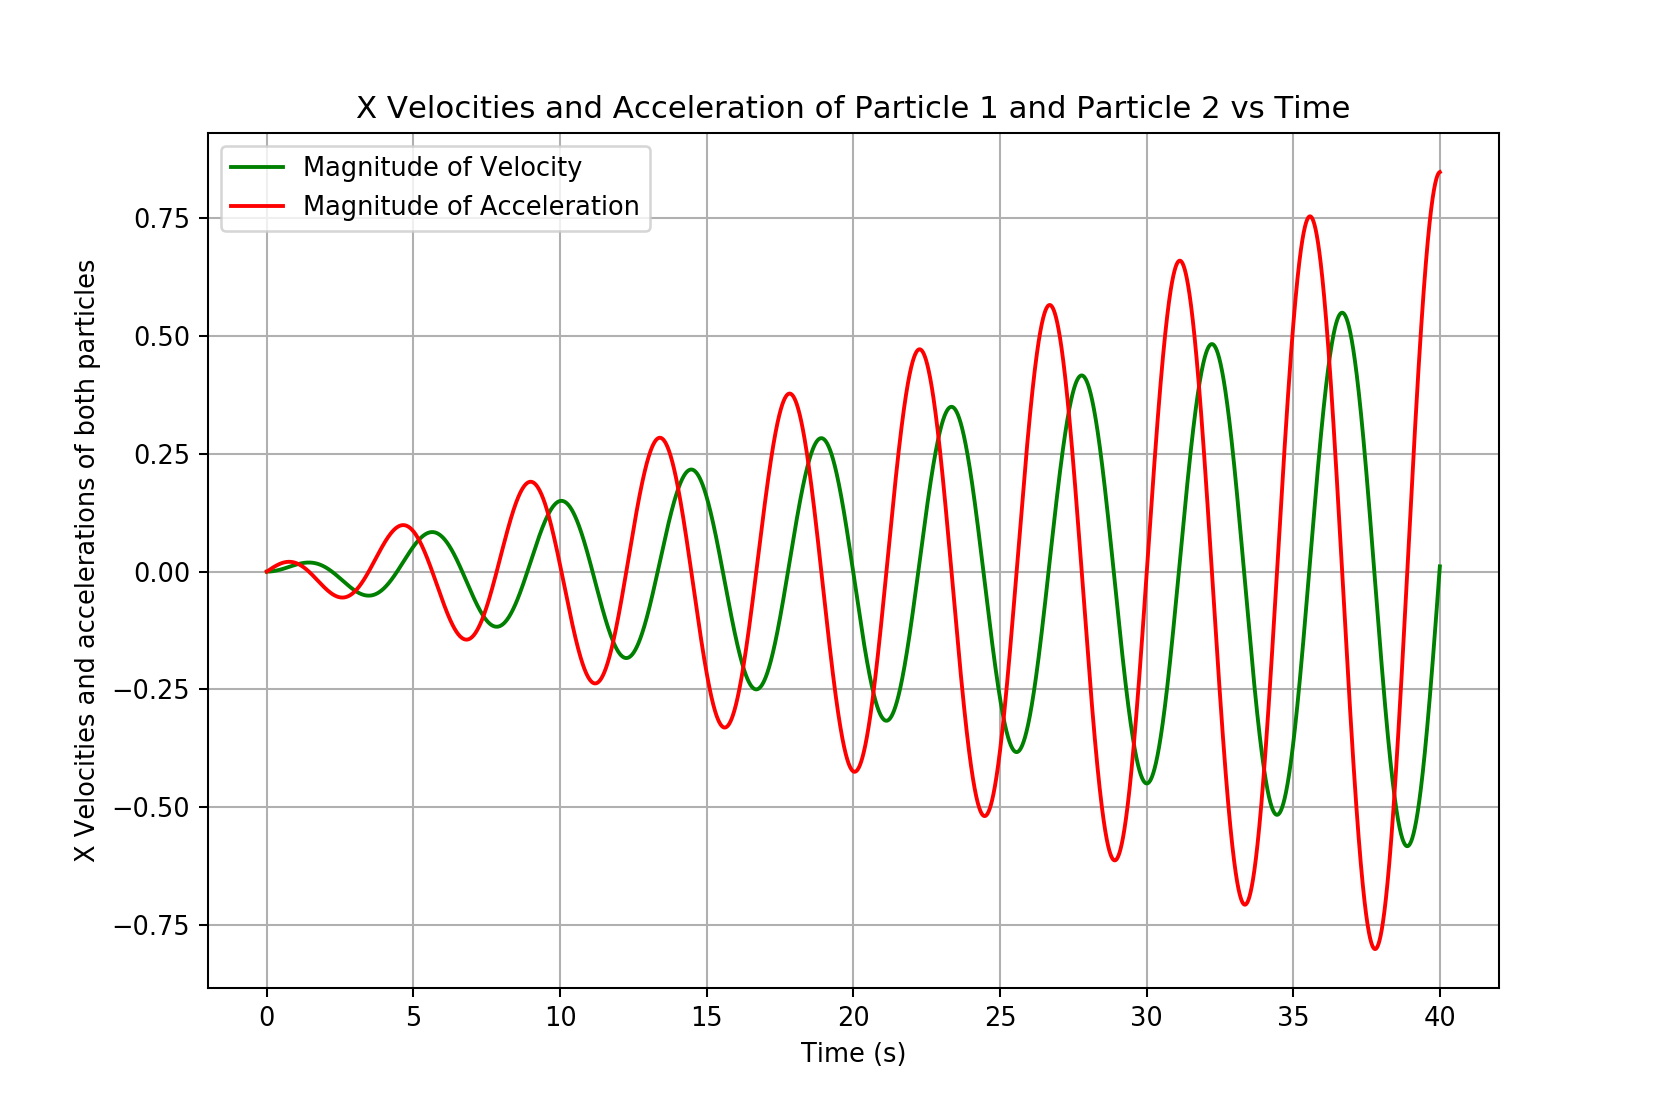

In [73]:
fig, (ax1) = plt.subplots(1, figsize=(9,6))

ax1.plot(timesteps, dipole.vel_1[:, 0], 'g', label = 'Magnitude of Velocity')
ax1.plot(timesteps, dipole.accel_1[:, 0], 'r', label = 'Magnitude of Acceleration')
#ax1.plot(timesteps, dipole.pos1[:, 0], 'b')

#ax1.plot(timesteps, dipole.vel_2[:, 0], 'g')
#ax1.plot(timesteps, dipole.accel_2[:, 0], 'r')
ax1.grid()


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Velocities and accelerations of both particles")
ax1.title.set_text("X Velocities and Acceleration of Particle 1 and Particle 2 vs Time")
ax1.legend()


In [8]:
omega_arr = np.arange(1,4,0.2)
omega_0 = np.sqrt(2)

E0 = 0.02
E0_array = 0.003*np.logspace(0,2,10)

plot_store = np.zeros(np.shape(omega_arr))
plot_store_log = np.zeros(np.shape(omega_log_arr))

for i in range(np.size(omega_arr)):
    external_force_arr = external_force_func(E0,omega_arr[i],timesteps)
    dipole_arr = Dipole(timesteps)
    posA,posB = dipole_arr.calc_trajectory()    
    plot_store[i] = np.amax(posB)



for i in range(np.size(E0_array)):
    external_force_arr = external_force_func(E0_array[i],omega_0,timesteps)
    dipole_arr = Dipole(timesteps)
    posA,posB = dipole_arr.calc_trajectory()    
    plot_store_log[i] = np.amax(posB)/E0

    
fig, (ax1,ax2) = plt.subplots(2, figsize=(9,6))

ax1.plot(omega_arr,plot_store)
ax2.semilogx(E0_array,plot_store_log)
ax1.grid()
ax2.grid()

NameError: name 'omega_log_arr' is not defined

In [74]:
def binary_search(array, value):
    low = 0
    high = array.size - 1
    midpoint = int((high - low) / 2)
    n = 0
    
    if value > array[high]:
        return -1
    
    while(low <= high and n < array.size):
        n+=1
        midpoint = int((low + high) / 2)
        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            high = midpoint - 1
        elif array[midpoint] < value:
            low = midpoint + 1
    return midpoint


In [75]:
class point_in_space():
    
    def __init__(self, x, y, z, timesteps):
        self.xyz = np.array([x, y, z])
        self.electric_field = np.zeros((timesteps.size, 3))
        self.electric_field_1 = np.zeros((timesteps.size, 3))
        self.electric_field_2 = np.zeros((timesteps.size, 3))
        self.first_index = 0
        self.first_index1 = 0
        self.first_index2 = 0
        self.iteration_flag = False
        
    def reset_electric_field(self):
        self.electric_field_1 = np.zeros((timesteps.size, 3))
        self.electric_field_2 = np.zeros((timesteps.size, 3))


In [76]:
indices = np.zeros(timesteps.shape)
def populate_electric_field_array(pos1, pos2, point_in_space, time, i):
    r1 = point_in_space.xyz - pos1
    r2 = point_in_space.xyz - pos2
    
    time1 = time + np.linalg.norm(r1) / c
    time2 = time + np.linalg.norm(r2) / c
    
    index1 = binary_search(timesteps, time1)
    index2 = binary_search(timesteps, time2)
    
    indices[i] = index1
    
    r_mag1 = np.linalg.norm(r1)
    r_mag2 = np.linalg.norm(r2)
    
    Ex1 = dipole.charge * (r1[0]*r_mag1**-3)
    Ey1 = dipole.charge * (r1[1]*r_mag1**-3)
    Ez1 = dipole.charge * (r1[2]*r_mag1**-3)
    
    Ex2 = -dipole.charge * (r2[0]*r_mag2**-3)
    Ey2 = -dipole.charge * (r2[1]*r_mag2**-3)
    Ez2 = -dipole.charge * (r2[2]*r_mag2**-3)
    
    if index1 != -1:
        point_in_space.electric_field_1[index1] = np.array([Ex1, Ey1, Ez1])
    if index2 != -1:
        point_in_space.electric_field_2[index2] = np.array([Ex2, Ey2, Ez2])
    
    if index1 == -1 and index2 == -1:
        point_in_space.iteration_flag = True
        
    if(i == 0):
        point_in_space.first_index1 = index1
        point_in_space.first_index2 = index2
        point_in_space.electric_field_1[:index1] = np.array([Ex1, Ey1, Ez1])
        point_in_space.electric_field_2[:index2] = np.array([Ex2, Ey2, Ez2])

p2 = point_in_space(-.75, -.5, 0, timesteps)
populate_electric_field_array(dipole.pos1[0], dipole.pos2[0], p2, 0, 0)
print(p2.first_index1)

1597


In [77]:
def relax(arr, relax_mask):
    keep_same = arr[relax_mask]
    first = arr[0]
    last = arr[-1]    
    
    arr = (np.roll(arr,-1, axis=0) + np.roll(arr,1,axis=0))/2
    
    arr[relax_mask] = keep_same
    arr[0] = first
    arr[-1] = last
    return arr
    
    

In [78]:


iterations = 1000
def calculate_electric_field(point_in_space, dipole):
    pos1 = dipole.pos1
    pos2 = dipole.pos2
    for i, t in enumerate(timesteps):
        populate_electric_field_array(pos1[i], pos2[i], point_in_space, t, i)
        if point_in_space.iteration_flag:
#             print("calculation done in", i, "iterations")
            break
    point_in_space.first_index = np.max(point_in_space.first_index1 + point_in_space.first_index2)
    
    relax_mask_1 = np.where(np.abs(point_in_space.electric_field_1) != 0)
    relax_mask_2 = np.where(np.abs(point_in_space.electric_field_2) != 0)

    for i in range(iterations):
        point_in_space.electric_field_1 = relax(point_in_space.electric_field_1, relax_mask_1)
        point_in_space.electric_field_2 = relax(point_in_space.electric_field_2, relax_mask_2)
    
    point_in_space.electric_field = point_in_space.electric_field_1 + point_in_space.electric_field_2
    

In [79]:
p1 = point_in_space(-0.75, -0.5, 0, timesteps)
p1.reset_electric_field()
calculate_electric_field(p1, dipole)

<IPython.core.display.Javascript object>


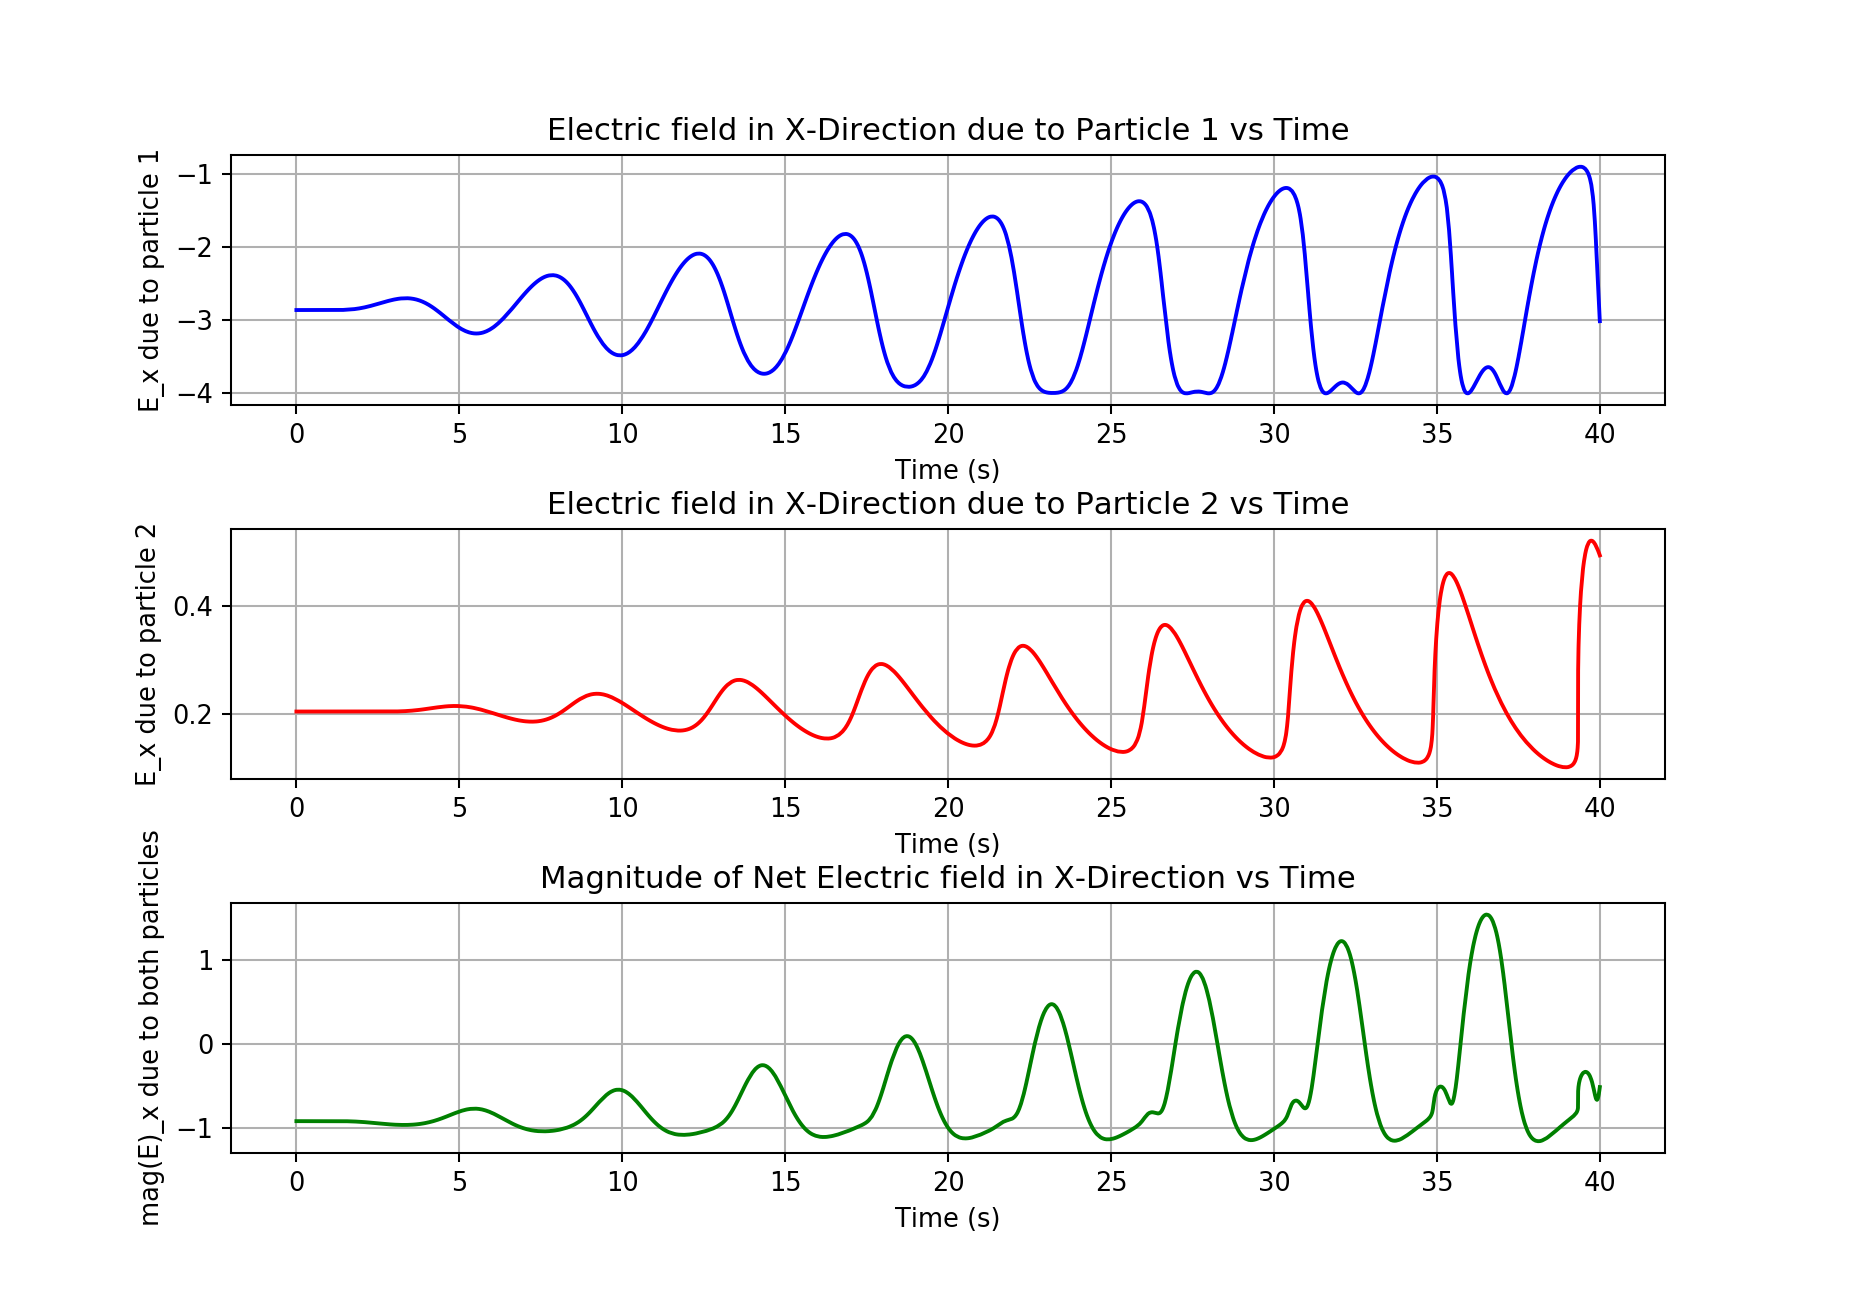

In [85]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10,7))
ax1.plot(timesteps[:], p1.electric_field_1[:, 1], 'b-')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("E_x due to particle 1")
#ax1.legend()


ax2.plot(timesteps[:], p1.electric_field_2[:, 1], 'r-')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("E_x due to particle 2")


ax3.plot(timesteps, p1.electric_field[:, 0], 'g-')
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("mag(E)_x due to both particles")

ax1.grid()
ax2.grid()
ax3.grid()

ax1.title.set_text("Electric field in X-Direction due to Particle 1 vs Time")
ax2.title.set_text("Electric field in X-Direction due to Particle 2 vs Time")
ax3.title.set_text("Magnitude of Net Electric field in X-Direction vs Time")

fig.subplots_adjust(hspace=.5)





In [16]:
def calc_electric_field(dipole, point):
    dif1 = point - dipole.particle1.pos
    dif2 = point - dipole.particle2.pos
    
    r_mag1 = np.linalg.norm(dif1)
    r_mag2 = np.linalg.norm(dif2)
    
    Ex = dipole.charge * (dif1[0]*r_mag1**-3 - dif2[0]*r_mag2**-3)
    Ey = dipole.charge * (dif1[1]*r_mag1**-3 - dif2[1]*r_mag2**-3)
    Ez = dipole.charge * (dif1[2]*r_mag1**-3 - dif2[2]*r_mag2**-3)
    
    return np.array([Ex, Ey, Ez])    


    
   

In [17]:
p3 = point_in_space(-0.75, -0.2, 0, timesteps)
p3.reset_electric_field()
calculate_electric_field(p3, dipole)

p4 = point_in_space(-0.75, 0.6, 0, timesteps)
p4.reset_electric_field()
calculate_electric_field(p4, dipole)

In [18]:
def calculate_vector_evolution_array(x, y, dipole):
    vector_evolution = np.empty(x.size, dtype=point_in_space)
    num_points = x.size
    for i in range(num_points):
        point = point_in_space(x[i], y[i], 0, timesteps)
        calculate_electric_field(point, dipole)
        vector_evolution[i] = point
        
        print("calculated electric field evolution ", (i + 1), "out of ", num_points)
    
    return vector_evolution

In [19]:
Nsteps = 2
grid_min = -1
grid_max = 1

x_grid, y_grid = np.meshgrid(np.linspace(grid_min, grid_max, Nsteps),
                      np.linspace(grid_min, grid_max, Nsteps))

x_test = np.ravel(x_grid)
y_test = np.ravel(y_grid)

p_array_test = calculate_vector_evolution_array(x_test, y_test, dipole)

calculated electric field evolution  1 out of  4
calculated electric field evolution  2 out of  4
calculated electric field evolution  3 out of  4
calculated electric field evolution  4 out of  4


In [20]:
def get_2D_electric_field(p_array, unit_vectors=True):
    x = np.zeros(p_array.size)
    y = np.zeros(p_array.size)
    Ex = np.zeros((p_array.size, timesteps.size))
    Ey = np.zeros((p_array.size, timesteps.size))
    for i, point in enumerate(p_array):
        x[i] = point.xyz[0]
        y[i] = point.xyz[1]
        Ex_current = point.electric_field[:, 0]
        Ey_current = point.electric_field[:, 1]
        
        if unit_vectors:
            mag_vec = np.sqrt(Ex_current**2 + Ey_current**2)
            Ex[i] = Ex_current / mag_vec
            Ey[i] = Ey_current / mag_vec   
        else:
            Ex[i] = Ex_current
            Ey[i] = Ey_current
        
    return x, y, Ex, Ey
    

<IPython.core.display.Javascript object>


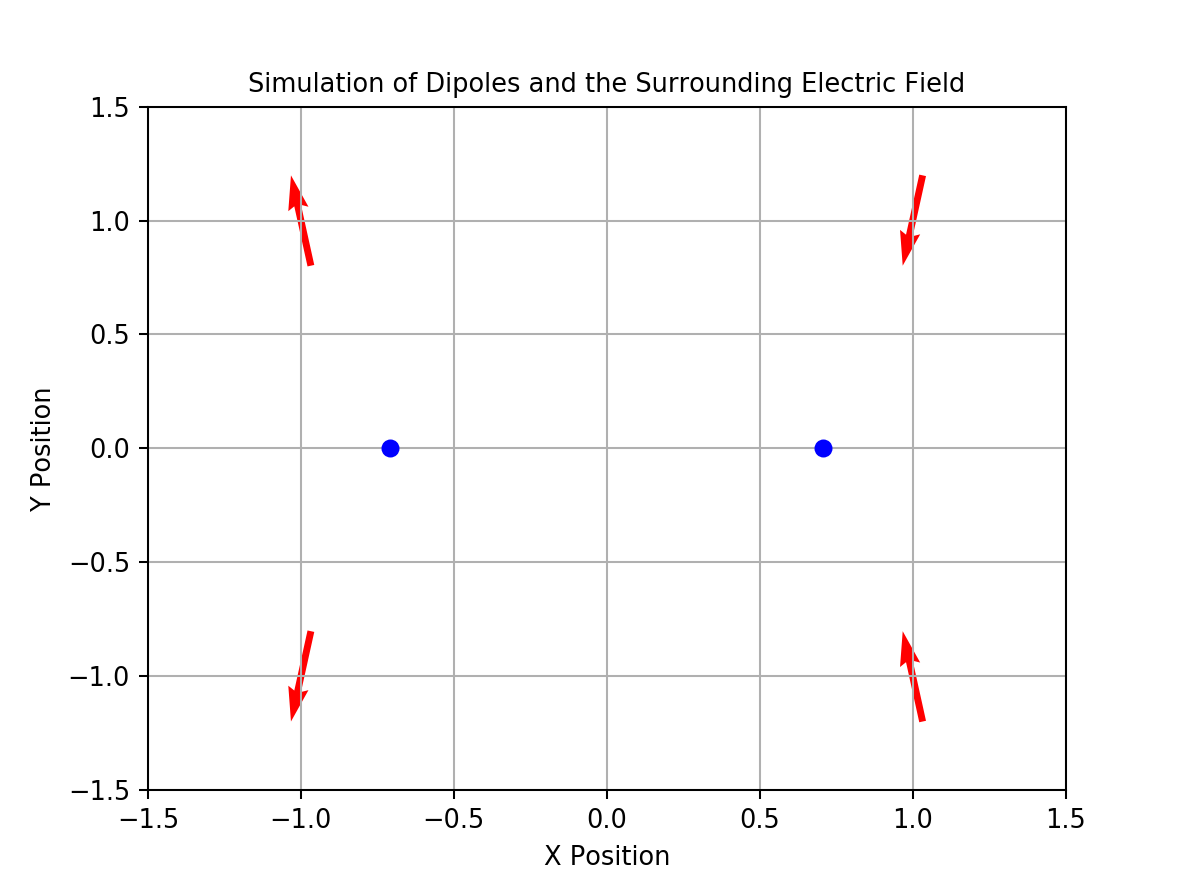

In [83]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
index = 0
speed_factor = 10
scale_factor = 1
frame_num = int(timesteps.size / speed_factor)

p_array = p_array_test
x, y, Ex, Ey = get_2D_electric_field(p_array, unit_vectors=True)
    
plt.grid()

E_changing_plot = ax.quiver(x, y, 
                   Ex[:, 0], Ey[:, 0], 
                   units='inches',pivot='mid',color='r', scale=2)

pos1 = dipole.pos1
pos2 = dipole.pos2
dipole_plot, = ax.plot([pos1[0][0], pos2[0][0]], [pos1[0][1], pos2[0][1]], 'bo')


x_comp_0 = Ex[:, 0]
y_comp_0 = Ey[:, 0]
vec = np.array([Ex, Ey, np.zeros(Ex.shape)])


unit_vecs = np.zeros((x_comp_0.size, 3))
ttl = ax.text(.5, 1.05, '', transform = ax.transAxes, va='top', ha = 'center')
    
def plot_point_in_space(i):
    x_component = Ex[:, i * speed_factor] * scale_factor
    y_component = Ey[:, i * speed_factor] * scale_factor
    
    E_changing_plot.set_UVC(x_component, y_component)
    
    dipole_x = [pos1[i * speed_factor, 0], pos2[i * speed_factor, 0]]
#     dipole_y = [pos1[i * speed_factor, 1], pos2[i * speed_factor, 1]]
    
    dipole_plot.set_xdata(dipole_x)
    
    ttl.set_text("Simulation of Dipoles and the Surrounding Electric Field")
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    
    return dipole_plot, E_changing_plot

anim = ani.FuncAnimation(fig, plot_point_in_space,
                               frames=frame_num, interval=1, blit=False)
plt.show()

<IPython.core.display.Javascript object>


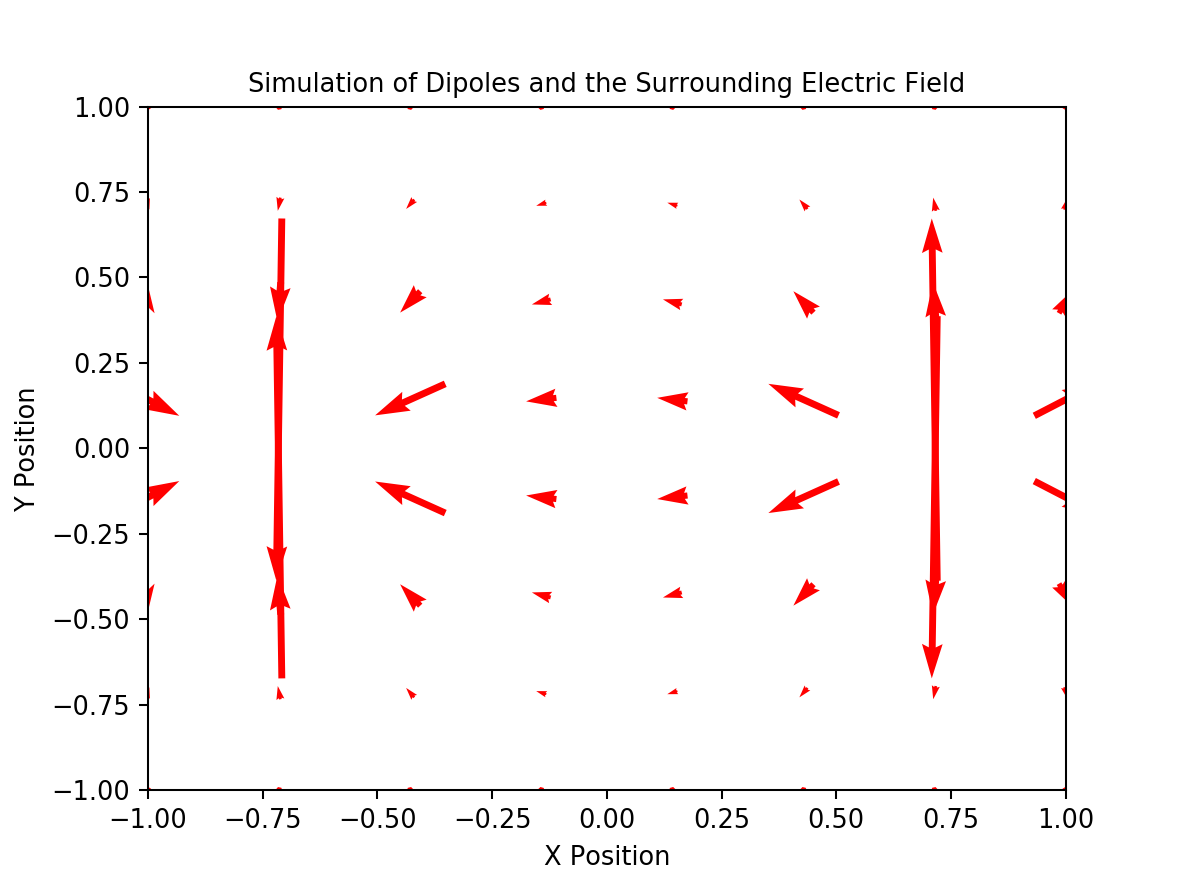

64


In [88]:
pos1, pos2 = dipole.calc_trajectory()
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))

Nsteps = 8
grid_min = -1
grid_max = 1

x, y = np.meshgrid(np.linspace(grid_min, grid_max, Nsteps),
                      np.linspace(grid_min, grid_max, Nsteps))
E = calc_electric_field(dipole, [x, y, 0])

magEfield = np.sqrt(E[0]**2 + E[1]**2 + E[2]**2)
maxMagEfield = np.max(magEfield)

mask_efield = np.where(magEfield < maxMagEfield * 1.1)
print(x.size)

ttl = ax.text(.5, 1.05, '', transform = ax.transAxes, va='top', ha = 'center')
ttl.set_text("Electric Field Strength at Various Points")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")

Qplot = ax.quiver(x[mask_efield], y[mask_efield], 
                   E[0][mask_efield], E[1][mask_efield], 
                   units='inches',pivot='mid',color='r', scale=25)

In [58]:
E0 = 0.02
omega = np.sqrt(2)

omega_2 = 0

def piecewise_force(timesteps,E0):
    force = np.zeros(np.shape(timesteps))
    for i in range(np.size(timesteps)):
        if i < np.size(timesteps)/4:
            force[i] = E0
        else:
            force[i] = 0
    return force
 


dipole_2 = Dipole(timesteps = timesteps, distance =1,k = 0)
external_force_arr = piecewise_force(timesteps,E0)
posa,posb = dipole_2.calc_trajectory()

new_point = point_in_space(0.5, 5, 0, timesteps)
new_point.reset_electric_field()
calculate_electric_field(new_point,dipole_2)

<IPython.core.display.Javascript object>


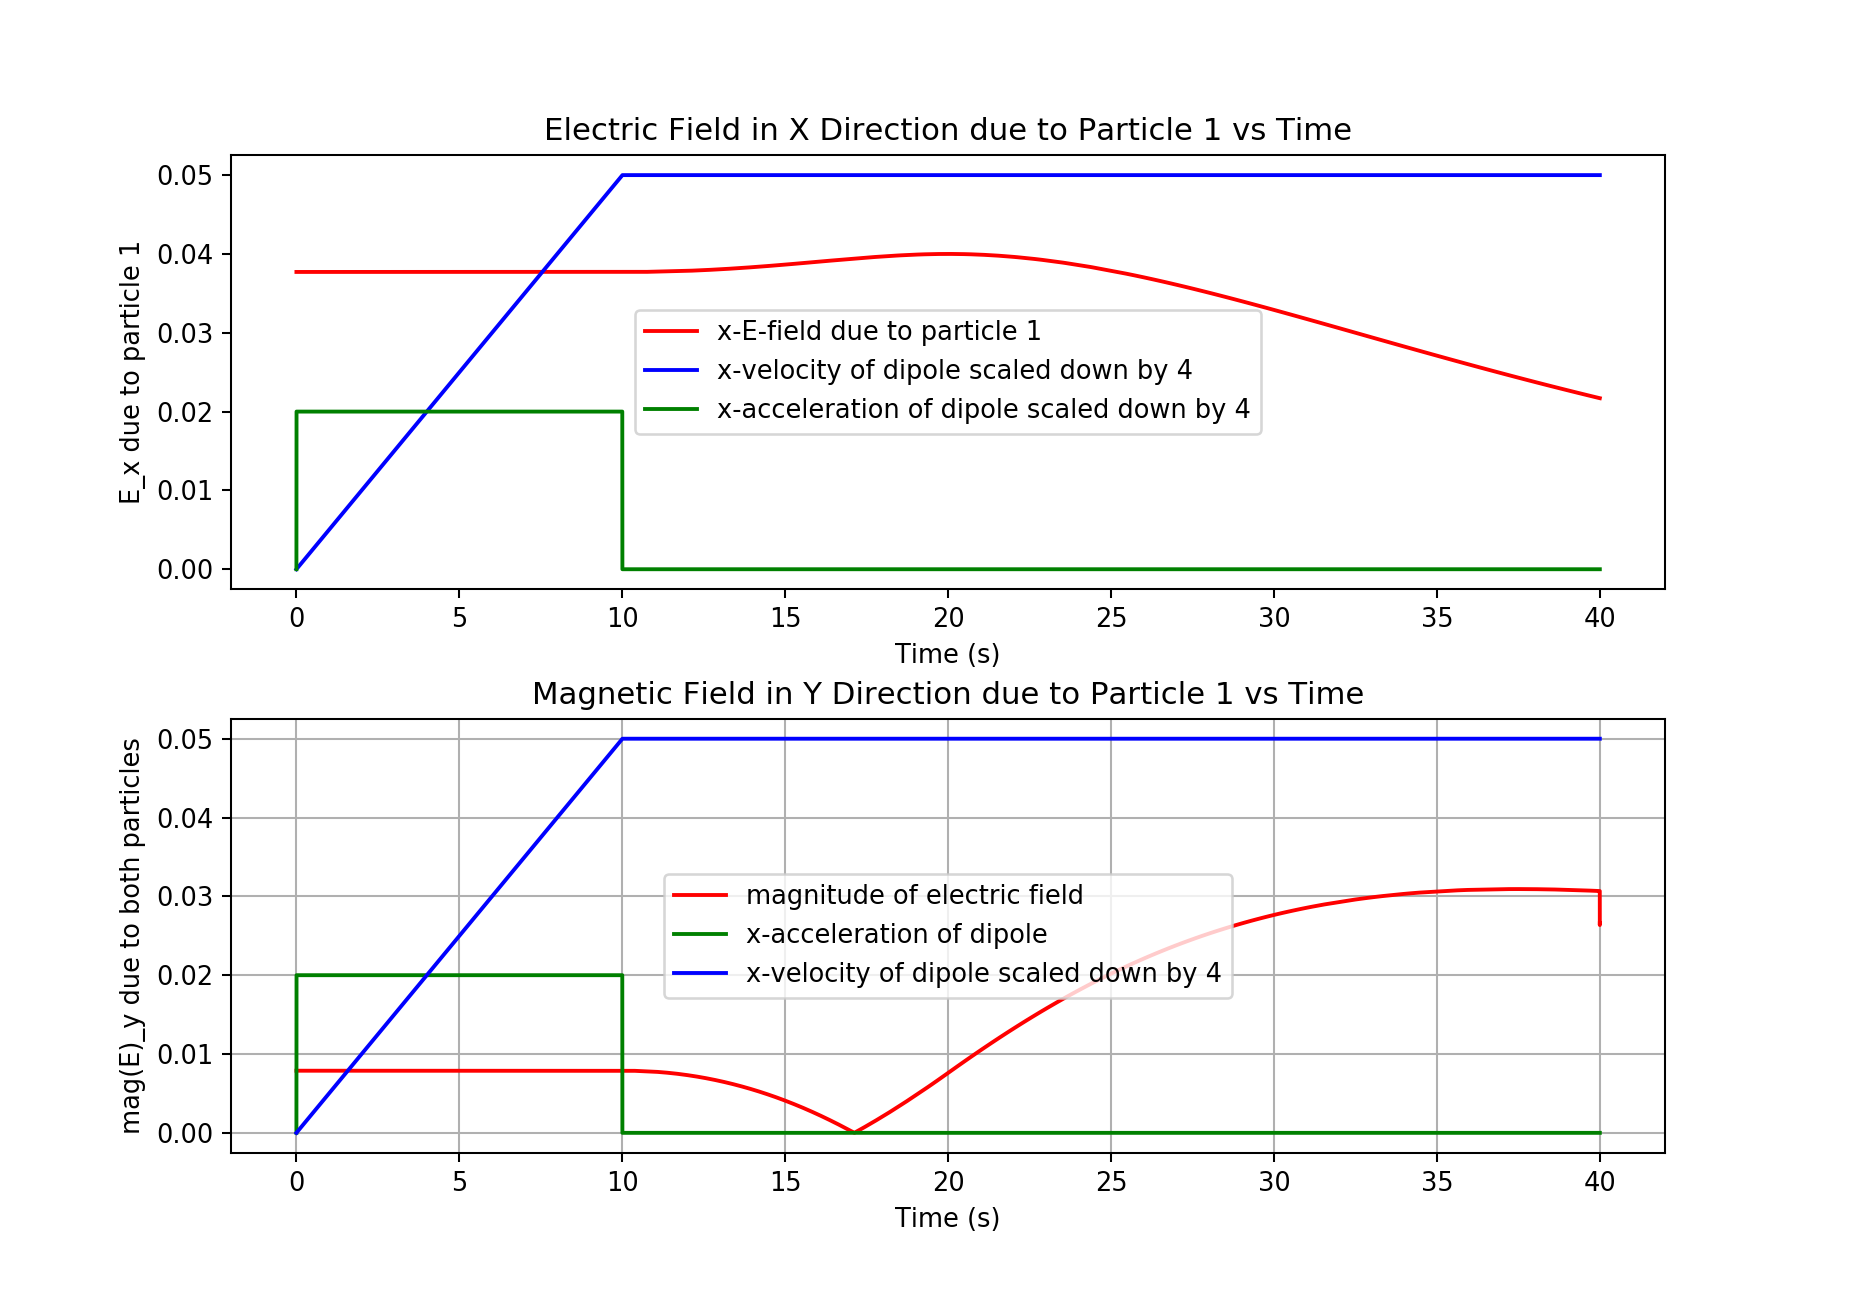

In [65]:
def magnitude(a1,a2):
    return np.sqrt(a1**2 + a2**2)


fig, (ax1,ax3) = plt.subplots(2, figsize=(10,7))
ax1.plot(timesteps, new_point.electric_field_1[:, 1], 'r-', label = 'x-E-field due to particle 1')
ax1.plot(timesteps, dipole_2.vel_1[:, 0]/4, 'b-', label = 'x-velocity of dipole scaled down by 4')
ax1.plot(timesteps, dipole_2.accel_1[:, 0], 'g-', label = 'x-acceleration of dipole scaled down by 4')
ax1.grid()
ax1.legend()


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("E_x due to particle 1")
ax1.legend()


#ax2.plot(timesteps, new_point.electric_field[:, 0], 'r-')
#ax2.set_xlabel("Time (s)")
#ax2.set_ylabel("mag(E)_x")


ax3.plot(timesteps, magnitude(new_point.electric_field[:, 1],new_point.electric_field[:, 0]), 'r-', label = 'magnitude of electric field')
ax3.plot(timesteps, dipole_2.accel_1[:, 0], 'g-', label = 'x-acceleration of dipole')
ax3.plot(timesteps, dipole_2.vel_1[:, 0]/4, 'b-', label = 'x-velocity of dipole scaled down by 4')
ax3.legend()


ax3.set_xlabel("Time (s)")
ax3.set_ylabel("mag(E)_y due to both particles")

ax1.grid()
#ax2.grid()
ax3.grid()

ax1.title.set_text("Electric Field in X Direction due to Particle 1 vs Time")
ax3.title.set_text("Magnetic Field in Y Direction due to Particle 1 vs Time")

fig.subplots_adjust(hspace=.3)

In [60]:
# superposition
omega_1 = np.sqrt(3)
omega_2 = 2
E0 = 0.02
E1 = 0.03

dipole_superPos = Dipole(timesteps = timesteps, distance =1,k = 1)
external_force_arr = E0*np.sin(omega_1*timesteps) + E1*np.sin(omega_1*timesteps + np.pi/3)
posa,posb = dipole_superPos.calc_trajectory()

superPos_point = point_in_space(0.5, 3, 0, timesteps)
superPos_point.reset_electric_field()
calculate_electric_field(superPos_point,dipole_superPos)

<IPython.core.display.Javascript object>


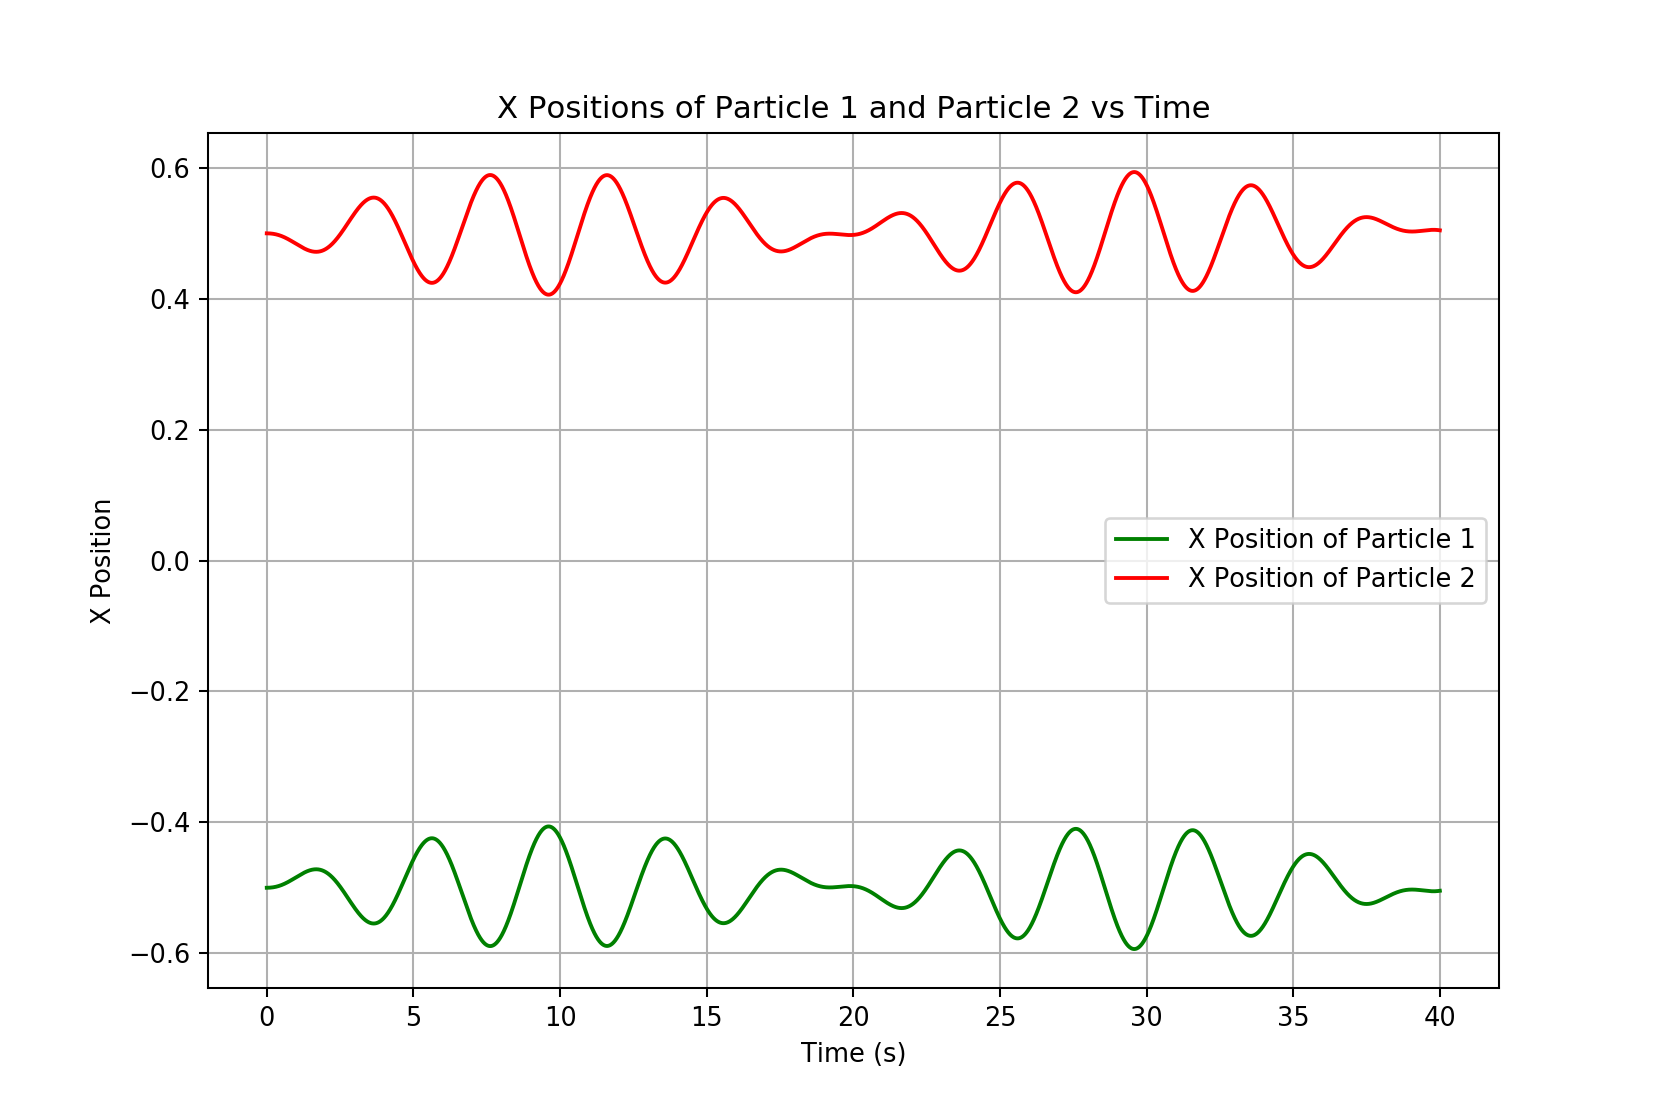

In [61]:
fig, (ax1) = plt.subplots(1, figsize=(9,6))

ax1.plot(timesteps, dipole_superPos.pos1[:, 0], 'g', label = "X Position of Particle 1")
ax1.plot(timesteps, dipole_superPos.pos2[:, 0], 'r', label = "X Position of Particle 2")
ax1.grid()


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Position")


ax1.title.set_text("X Positions of Particle 1 and Particle 2 vs Time")
ax1.legend()

<IPython.core.display.Javascript object>


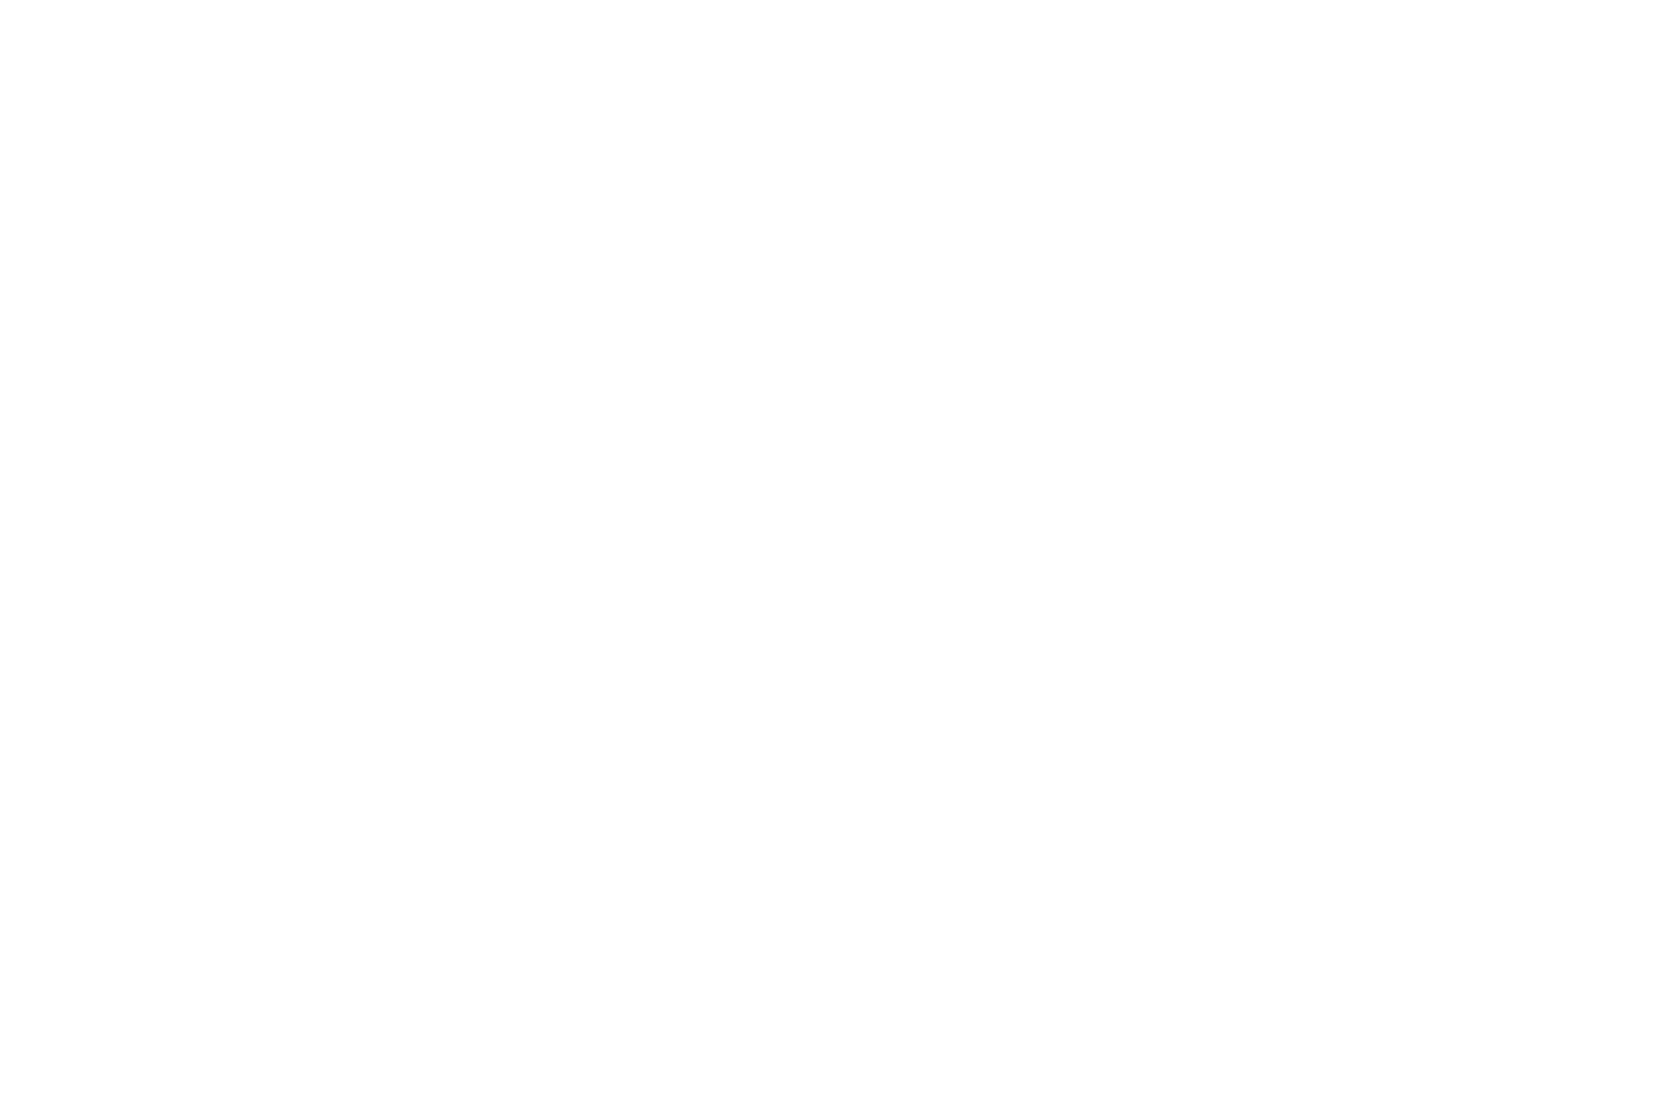

In [66]:
dipole_one = Dipole(timesteps = timesteps, distance =1,k = 1)
external_force_arr = E0*np.sin(omega_1*timesteps)
pos_one,pos_two = dipole_one.calc_trajectory()

dipole_two = Dipole(timesteps = timesteps, distance =1,k = 1)
external_force_arr = E1*np.sin(omega_1*timesteps+np.pi/3)
pos_one,pos_two = dipole_two.calc_trajectory()

fig, (ax1,ax2) = plt.subplots(2, figsize=(9,6))

ax1.plot(timesteps, dipole_one.pos1[:, 0], 'g', label = "X Position of Particle 1")
ax1.plot(timesteps, dipole_one.pos2[:, 0], 'r', label = "X Position of Particle 2")
ax1.grid()
ax1.legend()
ax1.title.set_text("X Positions of Particle 1 and Particle 2 vs Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Position")

ax2.plot(timesteps, dipole_two.pos1[:, 0], 'g', label = "X Position of Particle 1")
ax2.plot(timesteps, dipole_two.pos2[:, 0], 'r', label = "X Position of Particle 2")
ax2.grid()
ax2.legend()
ax2.title.set_text("X Positions of Particle 1 and Particle 2 vs Time")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("X Position")

fig.subplots_adjust(hspace=.35)

<IPython.core.display.Javascript object>


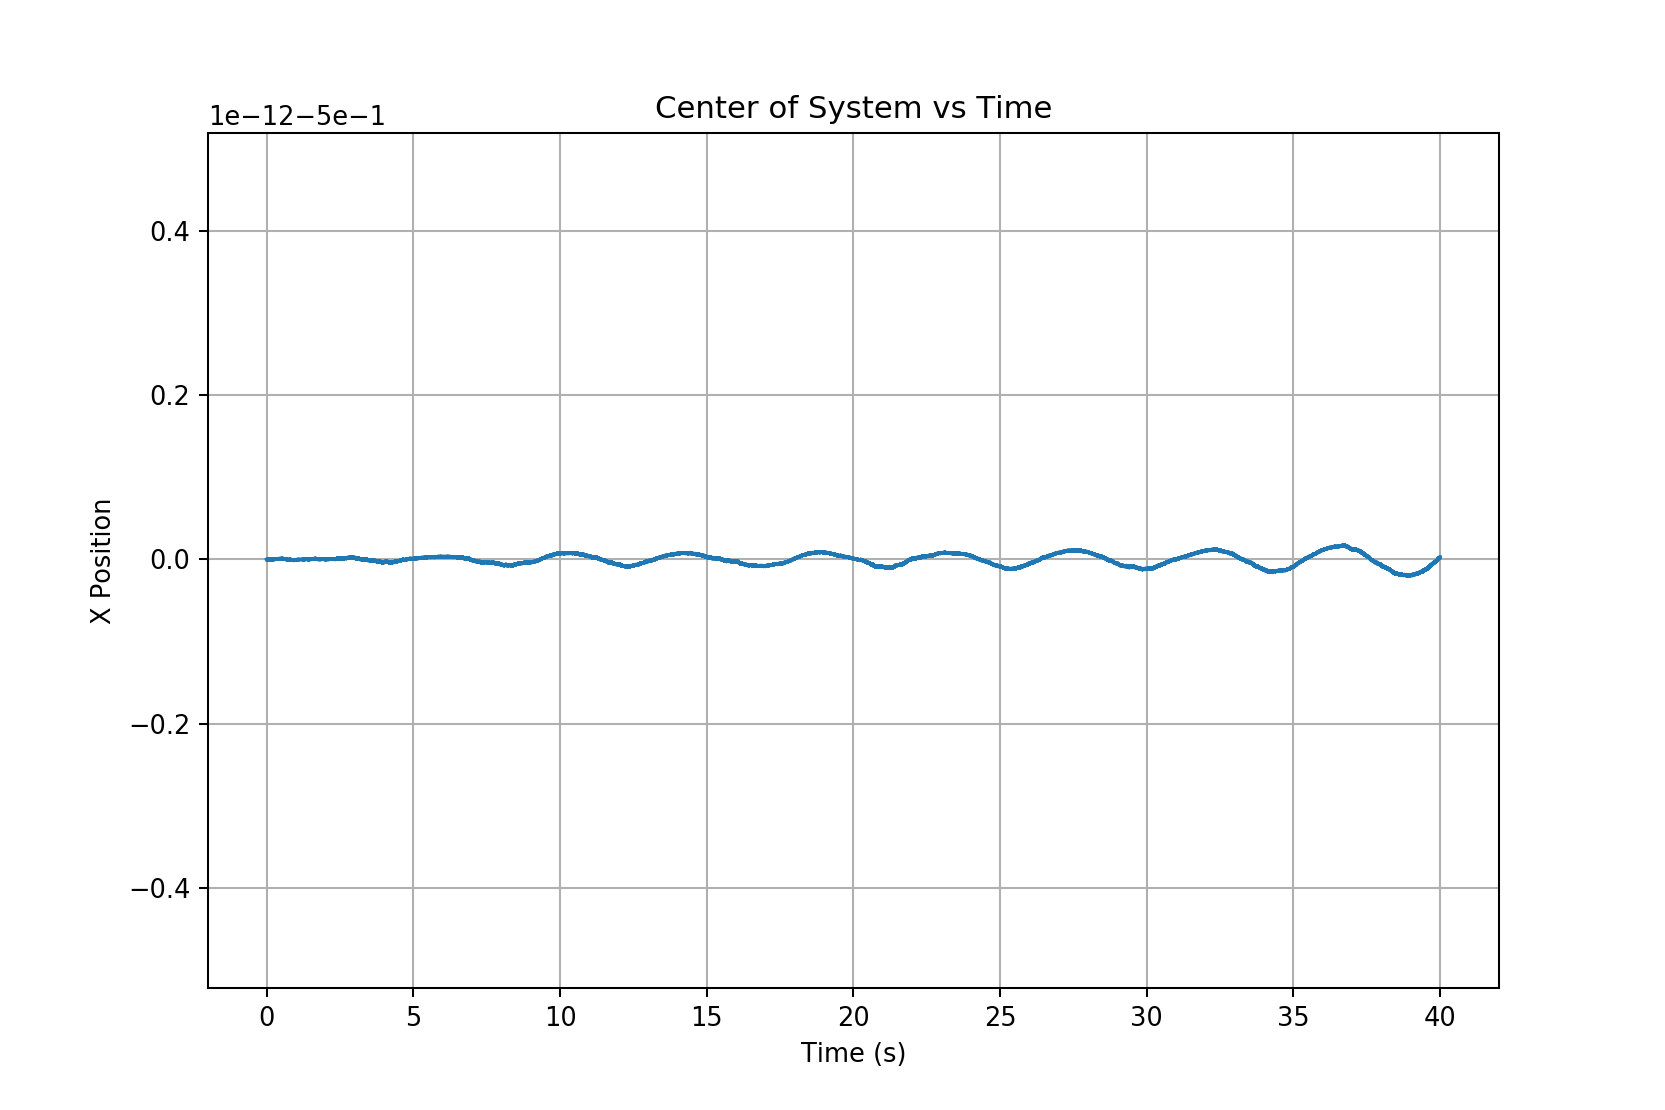

Text(0, 0.5, 'X Position')

In [63]:
fig, (ax1) = plt.subplots(1, figsize=(9,6))

difference = dipole_one.pos1 + dipole_two.pos1 -dipole_superPos.pos1 

ax1.plot(timesteps, difference[:,0])
ax1.grid()

ax1.title.set_text("Center of System vs Time")

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("X Position")
#comfirms superposition